# Regresión lineal simple en Python

## El paquete statsmodel para regresión

In [20]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('/Users/Ethan/Desktop/Python Data Science/python-ml-course/datasets/ads/Advertising.csv')

In [3]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

In [6]:
lm = smf.ols(formula = 'Sales~TV', data = data).fit()

In [7]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal sería:

Sales = 7.0325 + 0.0475*TV

In [8]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [9]:
lm.rsquared

0.611875050850071

In [10]:
lm.rsquared_adj

0.6099148238341623

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        21:12:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [13]:
import matplotlib.pyplot as plt

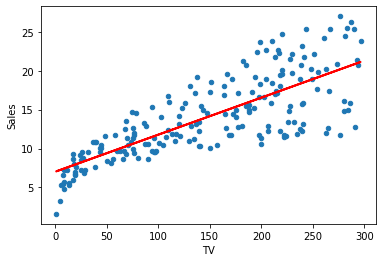

In [16]:
%matplotlib inline

data.plot(kind = 'scatter', x = 'TV', y = 'Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c = 'red', linewidth = 2)

In [17]:
data['sales_pred'] = 7.0326 + 0.0475*data['TV']

In [18]:
data['RSE'] = (data['Sales']-data['sales_pred'])**2

In [19]:
SSD = sum(data['RSE'])

In [21]:
RSE = np.sqrt(SSD/(len(data)-2))

In [22]:
RSE

3.258662382778687

In [23]:
sales_mean = np.mean(data['Sales'])

In [24]:
error = RSE / sales_mean
error

0.23238811786619265

(array([ 4., 10., 13., 17., 40., 43., 32., 16., 17.,  8.]),
 array([-8.37585, -6.8163 , -5.25675, -3.6972 , -2.13765, -0.5781 ,
         0.98145,  2.541  ,  4.10055,  5.6601 ,  7.21965]),
 <BarContainer object of 10 artists>)

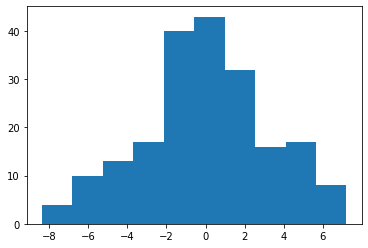

In [25]:
plt.hist((data['Sales']-data['sales_pred']))

# Regresión lineal multiple en Python

## El paquete statsmodel para regresión

* Sales ~ TV
* Sales ~ TV+Newspaper
* Sales ~ TV+Newspaper+Radio

In [39]:
lm2 = smf.ols(formula='Sales~TV+Newspaper', data = data).fit()

In [27]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [28]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [29]:
lm2.rsquared

0.6458354938293271

In [30]:
lm2.rsquared_adj

0.6422399150864777

In [31]:
sales_pred = lm2.predict(data[['TV', 'Newspaper']])

In [32]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [33]:
SSD = sum((data['Sales']-sales_pred)**2)

In [34]:
SSD

1918.561811896827

In [35]:
RSE = np.sqrt(SSD/(len(data)-2-1))

In [36]:
RSE

3.120719860252885

In [37]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           3.95e-45
Time:                        22:04:25   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm3 = smf.ols(formula='Sales~TV+Radio', data = data).fit()

In [42]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           4.83e-98
Time:                        22:06:03   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
sales_pred = lm3.predict(data[['TV', 'Radio']])
SSD = sum((data['Sales']-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [44]:
RSE

1.681360912508001

In [45]:
RSE / sales_mean

0.11990450436855059

In [46]:
lm4 = smf.ols(formula='Sales~TV+Radio+Newspaper', data = data).fit()

In [47]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        22:08:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
sales_pred = lm4.predict(data[['TV', 'Radio','Newspaper']])
SSD = sum((data['Sales']-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [50]:
RSE

1.6855103734147445

In [52]:
RSE / sales_mean

0.12020041885646242

# Multicolinealidad

Correlación entre variables predictoras del modelo

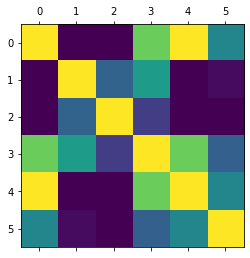

In [53]:
plt.matshow(data.corr())

In [54]:
data

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.96235,17.120148
1,44.5,39.3,45.1,10.4,9.14635,1.571638
2,17.2,45.9,69.3,9.3,7.84960,2.103660
3,151.5,41.3,58.5,18.5,14.22885,18.242722
4,180.8,10.8,58.4,12.9,15.62060,7.401664
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,8.84710,1.555258
196,94.2,4.9,8.1,9.7,11.50710,3.265610
197,177.0,9.3,6.4,12.8,15.44010,6.970128
198,283.6,42.0,66.2,25.5,20.50360,24.964013


##  Factor de Inflación de la varianza

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quitar del modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [64]:
# Newspaper ~ TV+Radio -> R^2  VIF = 1 / (1-R^2)
lm_n = smf.ols(formula='Newspaper~TV+Radio', data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1 / (1-rsquared_n)
VIF

1.1451873787239288

In [67]:
# TV ~ TV+Newspaper -> R^2  VIF = 1 / (1-R^2)
lm_tv = smf.ols(formula='TV~Newspaper+Radio', data = data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1 / (1-rsquared_tv)
VIF

1.0046107849396502

In [68]:
# Radio ~ TV+Newspaper -> R^2  VIF = 1 / (1-R^2)
lm_r = smf.ols(formula='Radio~Newspaper+TV', data = data).fit()
rsquared_r = lm_r.rsquared
VIF = 1 / (1-rsquared_r)
VIF

1.1449519171055353